In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data
df = pd.read_csv('Churn.csv')

# Data cleaning
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].fillna(0, inplace=True)

# Convert categorical variables to numerical
cat_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 
            'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
            'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
            'Contract', 'Paperless Billing', 'Payment Method', 'Churn']

# Label encoding for categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Feature selection
X = df.drop(['Customer ID', 'Churn'], axis=1)
y = df['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\user\AppData\Local\Temp\ipykernel_1952\1219785232.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(0, inplace=True)


In [6]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7934705464868701

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1040
           1       0.63      0.50      0.56       369

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



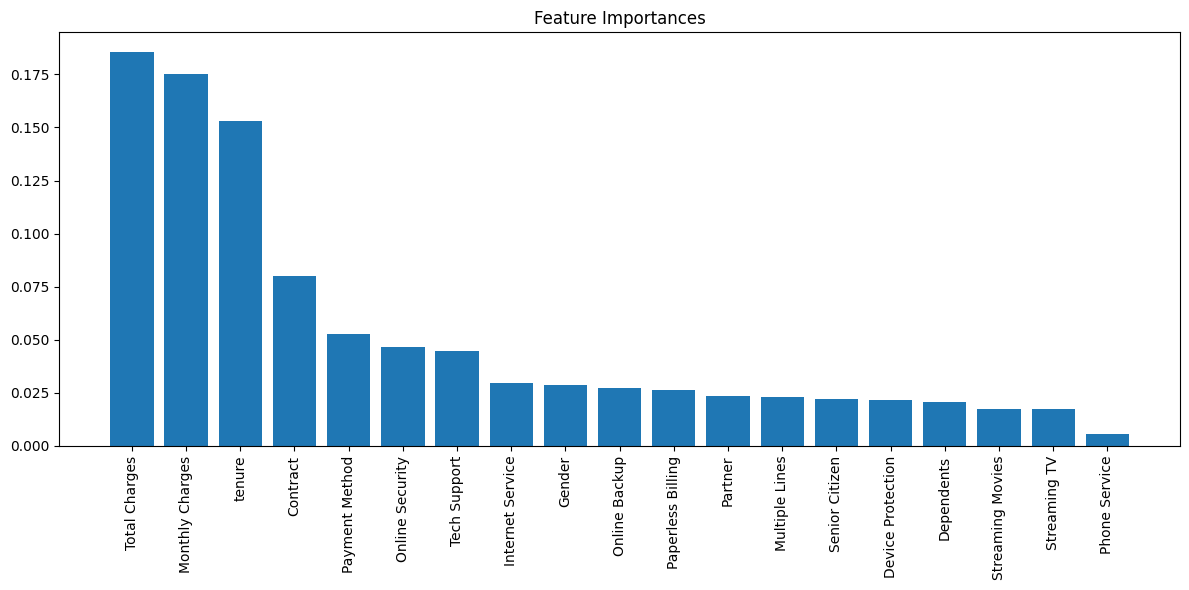

In [7]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

Churn
No     5175
Yes    1869
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_5724\1129557023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn',data=dataset,palette='coolwarm')


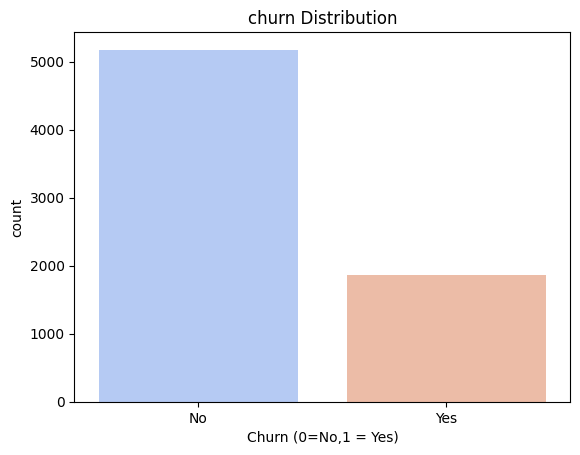

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

dataset  = pd.read_csv('Churn.csv')

print(dataset['Churn'].value_counts())

sns.countplot(x='Churn',data=dataset,palette='coolwarm')

plt.title('churn Distribution')

plt.xlabel('Churn (0=No,1 = Yes)')

plt.ylabel('count')

plt.show()






In [4]:
#missing values

print(dataset.isnull().sum())

print(dataset.describe)






Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64
<bound method NDFrame.describe of      Customer ID  Gender  Senior Citizen Partner Dependents  tenure  \
0     7590-VHVEA  Female               0     Yes         No       1   
1     7590-VHVEG  Female               0     Yes         No       1   
2     5575-GNVDE    Male               0      No         No      34   
3     3668-QPYBK    Male               0      No         No       2   
4     7795-CFOCW    Male               0      No         No      45   
...          ...     ...             ...    